# Análise de dados

Este projeto utilizou o conjunto de dados de pacientes coletados na Policlínica .... (PAAP/SMS), localizada no bairro de .... As informações diponíveis durante a pesquisa correspondem a pacientes de ambos os sexos, com idade variando entre 2 e 96 anos, de diversas etnias (brancos, negros, mulatos, indígenas e asiáticos), residentes no estado do Rio de Janeiro e entrevistados em os anos de 2006 e 2009, todos com suspeita de tuberculose pulmonar. Devido à restrições dos dados por causa da pesquisa, os mesmos não podem ser disponibilizados nesse reponsítório.

In [1]:
# Manipulação dos dados
import numpy  as np
import scipy  as sp
import pandas as pd

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn           as sns
%matplotlib inline

In [10]:
# Carregando os dados
data = pd.read_excel('../../Dados/Banco labels.xlsx')

In [11]:
# Visualização da tabela
data.head(5)

,TB_desfecho_final_Dri,Tbafranio,Obs_desfechoTB_Dri_Dani,Data_inclusão,Nome,Desfecho_tuberculose_lista_Mauro,Desfecho_TB_162_Revisão_ADRIANA,Observaça0_desfecho_TB,Resultado_BAAR_1,Resultado_BAAR_2,...,Perdeu_aula_hoje_CA,Deixou_de_ganhar_dinheiro_hoje_CA,Quanto_deixou_ganhar_CA,Caso_acompanhado_quem_custeou_tudo_CA,Valor_CA,Avaliador_custo_CA,Data_avaliação_custo_CA,Resultado_cultura_final < 3 & Realizou_RX = 1 (FILTER),ANO de inclusao,Novocriteriotbafranio
0,TB,SIM,NaN,2008-04-03,NaN,9,TB,TB PROBABILIDADE,Negativo,Negativo,...,IGN,IGN,Ignorado,IGN,ignorado,9,1999-09-09,Selected,2008,1
1,TB,SIM,NaN,2006-10-03,NaN,TB,TB,NaN,Negativo,Negativo,...,IGN,IGN,Ignorado,IGN,ignorado,9,1999-09-09,Selected,2006,1
2,TB,SIM,NaN,2007-06-21,NaN,TB,TB,TB CONFIRMADA,Negativo,Negativo,...,IGN,IGN,Ignorado,IGN,ignorado,9,1999-09-09,Selected,2007,1
3,TB,SIM,NaN,2009-09-30,NaN,TB,TB,NaN,Negativo,Negativo,...,IGN,IGN,Ignorado,IGN,ignorado,9,1999-09-09,Selected,2009,1
4,TB,SIM,NaN,2009-06-19,NaN,TB,NaN,NaN,Negativo,Negativo,...,Não,Não,"""Não se aplica""",não se aplica,não se aplica,Marcia dos Santos,2009-06-19,Not Selected,2009,1


In [12]:
features = ['desfecho', 'TTO_anterior_TB_triagem_enfermeiro', 'Cicatriz_BCG',
       'Idade', 'Sexo', 'Raça', 'Estado_civil', 'Tem_companheiro', 'Tosse',
       'Semanas_tosse', 'Expectoração', 'Semanas_expectoração', 'Hemoptóicos',
       'Semanas_hemoptóicos', 'Hemoptise', 'Semanas_hemoptise',
       'Sudorese_noturna', 'Semanas_sudorese', 'Febre',
       'Semanas_febre', 'Dispnéia', 'Dispnéia_semanas', 'Perda_de_apetite',
       'Perda_apetite_semanas', 'Perda_peso_10percent', 'Perda_peso_semanas',
       'Dor_torácica', 'Dor_torácica_semanas', 'Internação_hospital_2anos',
       'Prisão_2anos', 'Delegacia_2anos', 'Contato_TBP_2anos', 'Fuma',
       'Número_cigarros_dia', 'CAGE']

In [13]:
# Tipos de dados presentes
data.dtypes.value_counts()

object            239
datetime64[ns]     19
int64              14
float64             9
dtype: int64

In [18]:
# Verificando os dados do tipo float64
print('Features do tipo float64: \n{}'.format(list(data.select_dtypes(include=['float64']).columns)))

# Verificando os dados do tipo int64
print('\nFeatures do tipo int64: \n{}'.format(list(data.select_dtypes(include=['int64']).columns)))

# Verificando os dados do tipo object
print('\nFeatures do tipo object: \n{}'.format(list(data.select_dtypes(include=['object']).columns)))

Features do tipo float64: 
['Nome', 'Prontuário_PAAP', 'Número_cultura', 'Número_cultura_segunda_amostra', 'N°_TB', 'Peso_habitual', 'Peso_atual', 'Altura_cm', 'Valor_comida_bebida_CA']

Features do tipo int64: 
['Probabilidade_TBP_sem_RX_ou_BAAR', 'Probabilidade_TBP_com_RX_e_BAAR', 'Número_geral', 'Idade', 'Telefone_1', 'Telefone_2', 'CEP', 'Valor_pts_escore', 'Descrever_outros_fármacos', 'Valor_pernoite_CA', 'Valor_algo_CA', 'Valor_algo_posto_CA', 'ANO  de inclusao', 'Novocriteriotbafranio']

Features do tipo object: 
['desfecho', 'Tbafranio', 'Obs_desfechoTB_Dri_Dani', 'Desfecho_tuberculose_lista_Mauro', 'Desfecho_TB_162_Revisão_ADRIANA', 'Observaça0_desfecho_TB', 'Resultado_BAAR_1', 'Resultado_BAAR_2', 'Resultado_Cultutra_1', 'Resultado_Cultura_2', 'identificado_tb_ntb', 'Houve_desfecho_consulta_médica__inicial', 'Compareceram_consulta_medica', 'TTO_TB_confirmação_bacteriológica', 'TTO_TB_probabilidade', 'Transferência_internação_não_TB_outra_especialidade', 'TTO_pneumologia_patolo

In [21]:
# Mudança do label do desfecho.
data.rename(columns={'TB_desfecho_final_Dri':'desfecho'},inplace=True)

In [22]:
# Mudando a label de ignorados
data.replace(['IGN'],['ignorado'],inplace=True)

In [23]:
x.Raça.value_counts()

NameError: name 'x' is not defined

In [24]:
x.Raça_2.value_counts()

NameError: name 'x' is not defined

In [25]:
a = x[x.Raça == 'Não branco'].index

NameError: name 'x' is not defined

In [26]:
x.Raça_2[a].value_counts()

NameError: name 'x' is not defined

### Visualização gráfica dos dados

Visualização de dados básicos sobre os pacientes participantes do estudo.

### Desfecho

In [27]:
dados = data[(data.desfecho == 'TB+') | (data.desfecho == 'TB-')].copy()

In [28]:
data.desfecho.replace(['ignorado',8,'Não TB','TB'],['Desconhecido','Desconhecido','TB-','TB+'],inplace=True)

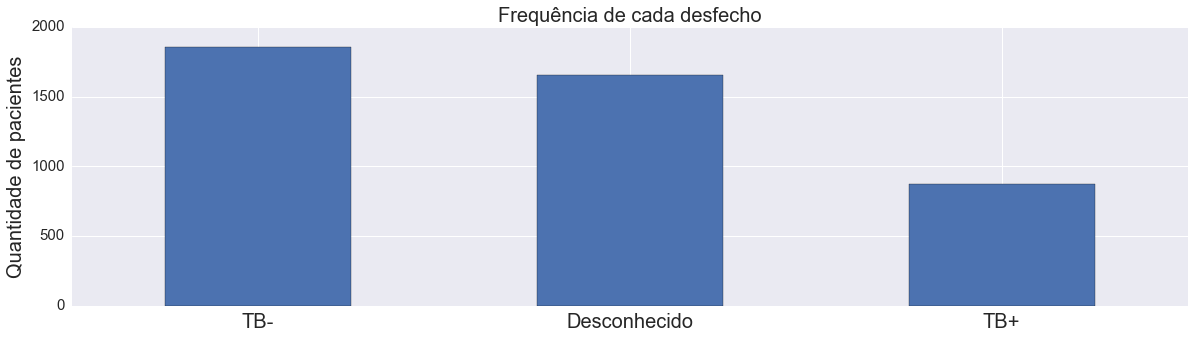

In [29]:
# Plot dos dados do desfecho
plt.figure(figsize=(20,5))
ax = data.desfecho.value_counts().plot(kind='bar')
# ax.set_axis_bgcolor("lightgray")
# ax.grid(b=None, which='minor', axis='y',linestyle='-')


plt.grid(True)
plt.title('Frequência de cada desfecho',fontsize=20)
plt.ylabel('Quantidade de pacientes',fontsize=20)
plt.xticks(fontsize=20,rotation=0)
plt.yticks(fontsize=15)
plt.show()

In [30]:
data.desfecho.value_counts()/len(data)

TB-             0.423648
Desconhecido    0.377539
TB+             0.198813
Name: desfecho, dtype: float64

In [31]:
len(data[data.desfecho == 'Desconhecido'])

1654

In [32]:
len(data[data.desfecho == 'TB+'])

871

In [33]:
len(data[data.desfecho == 'TB-'])

1856

### Idade

In [34]:
sorted(dados[dados.Idade < 150].Idade.unique())

[]

In [35]:
dados[dados.Idade < 150].Idade.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Idade, dtype: float64

In [178]:
data[data.Idade < 10]

,desfecho,Tbafranio,Obs_desfechoTB_Dri_Dani,Data_inclusão,Nome,Desfecho_tuberculose_lista_Mauro,Desfecho_TB_162_Revisão_ADRIANA,Observaça0_desfecho_TB,Resultado_BAAR_1,Resultado_BAAR_2,...,Perdeu_aula_hoje_CA,Deixou_de_ganhar_dinheiro_hoje_CA,Quanto_deixou_ganhar_CA,Caso_acompanhado_quem_custeou_tudo_CA,Valor_CA,Avaliador_custo_CA,Data_avaliação_custo_CA,Resultado_cultura_final < 3 & Realizou_RX = 1 (FILTER),ANO de inclusao,Novocriteriotbafranio
2713,TB-,NAO,NaN,2008-04-04,NaN,Não TB,NaN,NaN,Não realizado/Desconhecido,Não realizado/Desconhecido,...,ignorado,ignorado,Ignorado,ignorado,ignorado,9,1999-09-09,Not Selected,2008,0
2952,Desconhecido,NAO,NaN,2008-10-07,NaN,9,NaN,NaN,Não realizado/Desconhecido,Não realizado/Desconhecido,...,ignorado,ignorado,Ignorado,ignorado,ignorado,9,1999-09-09,Not Selected,2008,0
3198,Desconhecido,NAO,NaN,2009-05-15,NaN,Não TB,NaN,NaN,Não realizado/Desconhecido,Não realizado/Desconhecido,...,ignorado,ignorado,Ignorado,ignorado,ignorado,9,1999-09-09,Not Selected,2009,0
3875,Desconhecido,NAO,NaN,1999-09-09,NaN,Não TB,NaN,NaN,ignorado,ignorado,...,ignorado,ignorado,Ignorado,ignorado,ignorado,9,1999-09-09,Not Selected,1999,0
4031,Desconhecido,NAO,NaN,2006-12-04,NaN,9,NaN,NaN,ignorado,ignorado,...,ignorado,ignorado,Ignorado,ignorado,ignorado,9,1999-09-09,Not Selected,2006,0


In [42]:
data.Idade.value_counts()

47     104
49     101
51      93
53      91
42      90
27      89
57      87
52      83
46      83
43      82
50      81
30      80
60      79
28      79
24      79
62      78
54      78
44      78
33      78
36      75
37      75
45      73
56      73
22      72
48      72
35      71
59      70
34      70
32      70
23      69
      ... 
15      32
77      32
74      31
75      28
14      28
78      26
76      21
79      20
80      18
82      17
81      17
83      12
13      11
84      11
12       9
85       9
87       6
999      5
86       5
88       4
92       3
89       3
91       2
93       2
96       1
5        1
9        1
2        1
7        1
8        1
Name: Idade, dtype: int64

In [38]:
data.Idade.describe()

count    4381.000000
mean       46.984707
std        36.772905
min         2.000000
25%        31.000000
50%        46.000000
75%        60.000000
max       999.000000
Name: Idade, dtype: float64

In [175]:
np.max(data.Idade)

999

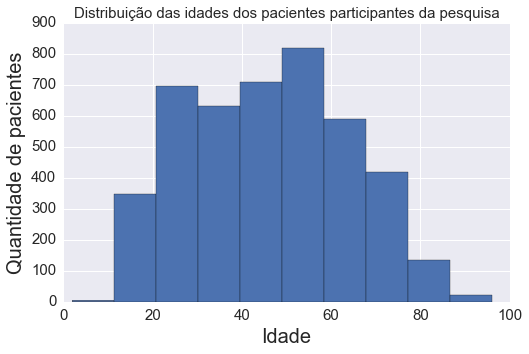

In [35]:
plt.figure(figsize=(8,5))
plt.hist(data[data.Idade < 150].Idade)
plt.title('Distribuição das idades dos pacientes participantes da pesquisa',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Idade',fontsize=20)
plt.ylabel('Quantidade de pacientes',fontsize=20)
plt.show()

In [36]:
a = data[(data.Idade < 150) & (data.desfecho == 'TB+')]
b = data[(data.Idade < 150) & (data.desfecho == 'TB-')]

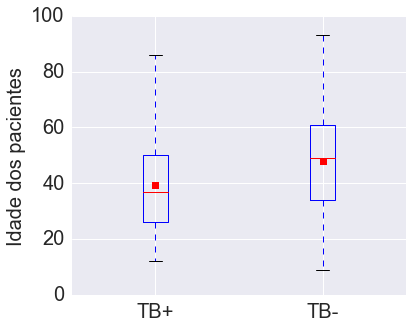

In [37]:
plt.figure(figsize=(6,5))
plt.boxplot([a.Idade,b.Idade],labels=['TB+','TB-'],showmeans=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Idade dos pacientes',fontsize=20)
plt.show()

### Sexo

In [45]:
data.Sexo.replace(['ignorado',2],['Desconhecido','Desconhecido'],inplace=True)

In [46]:
data.Sexo.unique()

array(['Masculino', 'Feminino', 'Desconhecido'], dtype=object)

In [49]:
data.Sexo.value_counts()/len(data)

Masculino       0.522712
Feminino        0.474321
Desconhecido    0.002967
Name: Sexo, dtype: float64

In [51]:
x = data[(data.Sexo != 'Desconhecido') & (data.desfecho != 'Desconhecido')]
x.Sexo.unique()

array(['Masculino', 'Feminino'], dtype=object)

In [36]:
dados[features]

,desfecho,TTO_anterior_TB_triagem_enfermeiro,Cicatriz_BCG,Idade,Sexo,Raça,Estado_civil,Tem_companheiro,Tosse,Semanas_tosse,...,Perda_peso_semanas,Dor_torácica,Dor_torácica_semanas,Internação_hospital_2anos,Prisão_2anos,Delegacia_2anos,Contato_TBP_2anos,Fuma,Número_cigarros_dia,CAGE


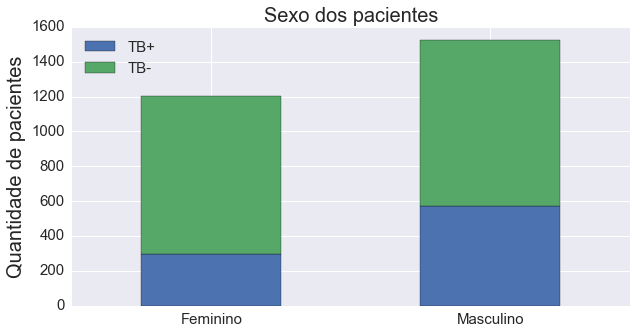

In [57]:

ax = x.groupby(['Sexo','desfecho']).size().unstack().plot(kind='bar', stacked=True,figsize=(10,5))
plt.title('Sexo dos pacientes',fontsize=20)
plt.ylabel('Quantidade de pacientes',fontsize=20)
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15,rotation=0)
plt.legend(fontsize=15,loc='best')
plt.xlabel('')
plt.show()

In [15]:
data[['Sexo','desfecho']].plot(kind='bar',stacked=True)

TypeError: Empty 'DataFrame': no numeric data to plot

In [171]:
q = data[(data.desfecho == 'TB+') | (data.desfecho == 'TB-')]

In [172]:
q.Sexo.value_counts()

Masculino       1522
Feminino        1202
Desconhecido       3
Name: Sexo, dtype: int64

In [167]:
len(data[data.desfecho == 'Desconhecido'])

1654

In [165]:
len(data[data.desfecho == 'TB+'])

871

In [166]:
len(data[data.desfecho == 'TB-'])

1856

In [18]:
# Stacked bar
a = data[(data.Sexo == 'Masculino') & (data.desfecho == 'TB+')]
b = data[(data.Sexo == 'Feminino' ) & (data.desfecho == 'TB+')]
c = data[(data.Sexo == 'Masculino') & (data.desfecho == 'TB-')]
d = data[(data.Sexo == 'Feminino' ) & (data.desfecho == 'TB-')]

In [19]:
len(a) + len(b) + len(c) + len(d)

2724

In [23]:
len(a)/(len(a) + len(c))

0.3771353482260184

In [24]:
len(b)/(len(b) + len(d))

0.24708818635607321

In [108]:
plt.figure(figsize=(6,5))
plt.bar([len(a),len(b)],labels=['Masculino','Feminino'],showmeans=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Idade dos pacientes',fontsize=20)
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

### Tosse

In [190]:
dados.Semanas_tosse.replace(['crônico+sempre'],10,inplace=True)

In [222]:
dados.Semanas_tosse.value_counts()

2           492
4           433
0           393
8           276
1           266
3           236
12          184
6            80
16           70
5            59
24           56
10           41
20           28
48           24
ignorado     15
32           12
18           11
40            8
9             8
7             4
52            4
36            4
180           3
28            3
14            2
58            2
72            2
96            2
15            1
13            1
44            1
50            1
19            1
56            1
30            1
104           1
448           1
Name: Semanas_tosse, dtype: int64

In [224]:
dados[dados.Semanas_tosse == 'ignorado']['Tosse']

0            Sim
375          Sim
389          Sim
556          Sim
749          Sim
985          Sim
1011         Sim
1082         Sim
1146         Sim
1171         Sim
1243         Sim
1608         Sim
1731         Sim
2006    ignorado
2476         Sim
Name: Tosse, dtype: object

In [228]:
dados.Estado_civil.unique()

array(['Solteiro', nan, 'viúvo', 'Casado', 'ignorado', 'Separado', 0], dtype=object)

## Raça

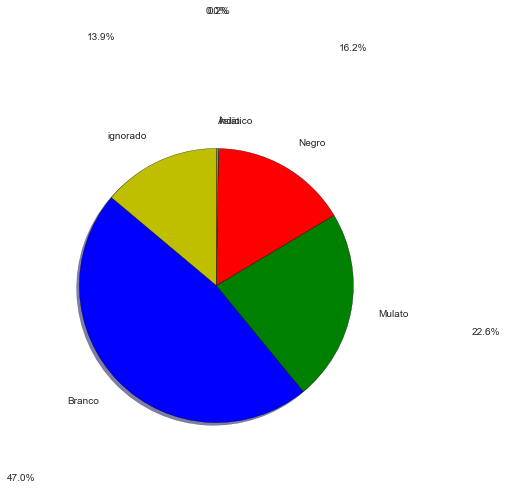

In [56]:
# Conta na mão,
labels = ['Branco', 'Mulato', 'Negro', 'Índio', 'Asiático', 'ignorado']

# Tamanho de cada classe
size = [2061, 992, 709, 8, 1, 610]

explode = (0,0,0,0,0,0)

# Plot
plt.figure(figsize=(5,5))
plt.pie(size, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140,radius=1,pctdistance=2.0, labeldistance=1.2)

plt.yticks(fontsize=20)
plt.axis('equal')
plt.show()

ValueError: incompatible sizes: argument 'height' must be length 4 or scalar

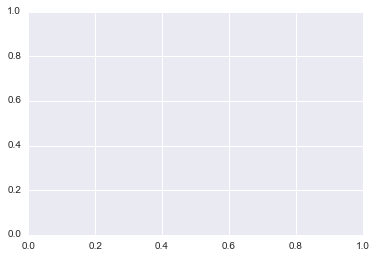

In [60]:
# Conta na mão,
labels = ['Branco', 'Mulato', 'Negro', 'Índio', 'Asiático', 'ignorado']

# Tamanho de cada classe
size = [2061, 992, 709, 8, 1, 610]

plt.bar([0,1,2,3],size)

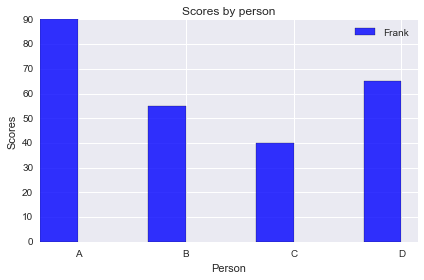

In [58]:
# data to plot
n_groups = 4
means_frank = (90, 55, 40, 65)
means_guido = (85, 62, 54, 20)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_frank, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Frank')
 
rects2 = plt.bar(index + bar_width, means_guido, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Guido')
 
plt.xlabel('Person')
plt.ylabel('Scores')
plt.title('Scores by person')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
plt.legend()
 
plt.tight_layout()
plt.show()

In [61]:
47.04 + 21.04 + 16.18 + 13.92 + 0.18 + 0.02

98.38

In [62]:
sum(size)

4381

In [63]:
size/sum(size)

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [66]:
x = 100 * np.array(size)/sum(size)

In [70]:
for i in x:
    print('{:.2f}'.format(i))

47.04
22.64
16.18
0.18
0.02
13.92


In [73]:
data.Estado_civil.replace([0],['ignorado'],inplace=True)

In [75]:
data.desfecho.value_counts()

Não TB      1856
ignorado    1633
TB           871
8             21
Name: desfecho, dtype: int64

In [74]:
data.Estado_civil.value_counts()/len(data.Estado_civil)

Solteiro    0.532983
Casado      0.309747
viúvo       0.085369
Separado    0.055695
ignorado    0.015750
Name: Estado_civil, dtype: float64

In [40]:
features = ['desfecho', 'TTO_anterior_TB_triagem_enfermeiro', 'Cicatriz_BCG',
       'Idade', 'Sexo', 'Raça', 'Estado_civil', 'Tem_companheiro', 'Tosse',
       'Semanas_tosse', 'Expectoração', 'Hemoptóicos',
       'Hemoptise', 
       'Febre',
       'Dispnéia', 'Perda_de_apetite',
       'Perda_peso_10percent',
       'Dor_torácica', 'Internação_hospital_2anos',
       'Prisão_2anos', 'Delegacia_2anos', 'Contato_TBP_2anos', 'Fuma',
       'CAGE']

In [41]:
data[features]

,desfecho,TTO_anterior_TB_triagem_enfermeiro,Cicatriz_BCG,Idade,Sexo,Raça,Estado_civil,Tem_companheiro,Tosse,Semanas_tosse,...,Dispnéia,Perda_de_apetite,Perda_peso_10percent,Dor_torácica,Internação_hospital_2anos,Prisão_2anos,Delegacia_2anos,Contato_TBP_2anos,Fuma,CAGE
0,TB+,Sim,Sim,30,Masculino,Não branco,Solteiro,Não,Sim,ignorado,...,Não,Não,Não,Não,Sim,Não,Não,Não,Fumante,Negativo
1,TB+,Sim,ignorado,53,Feminino,Branco,NaN,Não,Sim,2,...,Sim,ignorado,Não,Não,Não,Não,Não,Não,Ex-fumante,Negativo
2,TB+,Não,Não,84,Feminino,Branco,viúvo,Não,Sim,3,...,Não,ignorado,Sim,Sim,Não,Não,Não,Não,Jamais fumante,Negativo
3,TB+,Não,Sim,18,Feminino,Branco,Solteiro,Sim,Sim,20,...,Sim,Não,Não,Sim,Não,Não,Não,Sim,Jamais fumante,Negativo
4,TB+,Sim,ignorado,36,Masculino,Não branco,Solteiro,Não,Sim,2,...,Sim,Não,Não,Sim,Não,Não,Não,Não,Fumante,Positivo
5,TB+,Não,Sim,71,Masculino,Não branco,Casado,Sim,Sim,4,...,Sim,Sim,Não,Sim,Não,Não,Não,Não,Ex-fumante,Negativo
6,TB+,Não,Não,26,Masculino,Branco,Solteiro,Sim,Sim,104,...,Sim,Não,Não,Sim,Não,Não,Não,Não,Ex-fumante,Negativo
7,TB+,Não,Sim,22,Feminino,Branco,Solteiro,Não,Sim,2,...,Sim,Não,Não,Sim,Não,Não,Não,Não,Jamais fumante,Negativo
8,TB+,Não,Não,54,Masculino,Não branco,Casado,Não,Sim,3,...,Sim,Sim,Sim,Sim,Não,Não,Não,Não,Fumante,Positivo
9,TB+,Sim,Sim,52,Masculino,Não branco,Solteiro,Não,Sim,5,...,Sim,Não,Não,Sim,Não,Não,Não,Não,Ex-fumante,Positivo


In [43]:
data.TTO_anterior_TB_triagem_enfermeiro.value_counts() * 100 / len(data)

Não         77.311116
Sim         21.981283
ignorado     0.707601
Name: TTO_anterior_TB_triagem_enfermeiro, dtype: float64

In [44]:
data.TTO_anterior_TB_triagem_enfermeiro.value_counts()

Não         3387
Sim          963
ignorado      31
Name: TTO_anterior_TB_triagem_enfermeiro, dtype: int64

In [46]:
data.Cicatriz_BCG.value_counts()

ignorado    1765
Sim         1514
Não         1102
Name: Cicatriz_BCG, dtype: int64

In [45]:
data.Cicatriz_BCG.value_counts() * 100 / len(data)

ignorado    40.287606
Sim         34.558320
Não         25.154074
Name: Cicatriz_BCG, dtype: float64

In [47]:
data.Estado_civil.value_counts()

Solteiro    2335
Casado      1357
viúvo        374
Separado     244
ignorado      63
0              6
Name: Estado_civil, dtype: int64

In [48]:
data.Estado_civil.value_counts() * 100 / len(data)

Solteiro    53.298334
Casado      30.974663
viúvo        8.536864
Separado     5.569505
ignorado     1.438028
0            0.136955
Name: Estado_civil, dtype: float64

In [49]:
data.Tem_companheiro.value_counts()

Sim         2268
Não         2023
ignorado      90
Name: Tem_companheiro, dtype: int64

In [50]:
data.Tem_companheiro.value_counts() * 100 / len(data)

Sim         51.769003
Não         46.176672
ignorado     2.054325
Name: Tem_companheiro, dtype: float64

In [51]:
data.Tosse.value_counts()

Sim         3674
Não          705
ignorado       2
Name: Tosse, dtype: int64

In [52]:
data.Tosse.value_counts() * 100 / len(data)

Sim         83.862132
Não         16.092216
ignorado     0.045652
Name: Tosse, dtype: float64

In [55]:
data.Expectoração.value_counts()

Sim         2939
Não         1434
ignorado       7
8              1
Name: Expectoração, dtype: int64

In [54]:
data.Expectoração.value_counts() * 100 / len(data)

Sim         67.085140
Não         32.732253
ignorado     0.159781
8            0.022826
Name: Expectoração, dtype: float64

In [56]:
for f in features:
    print('feature ' + f)
    print(data[f].value_counts())
    print(data[f].value_counts() * 100 / len(data))
    print()

feature desfecho
TB-             1856
Desconhecido    1654
TB+              871
Name: desfecho, dtype: int64
TB-             42.364757
Desconhecido    37.753937
TB+             19.881306
Name: desfecho, dtype: float64

feature TTO_anterior_TB_triagem_enfermeiro
Não         3387
Sim          963
ignorado      31
Name: TTO_anterior_TB_triagem_enfermeiro, dtype: int64
Não         77.311116
Sim         21.981283
ignorado     0.707601
Name: TTO_anterior_TB_triagem_enfermeiro, dtype: float64

feature Cicatriz_BCG
ignorado    1765
Sim         1514
Não         1102
Name: Cicatriz_BCG, dtype: int64
ignorado    40.287606
Sim         34.558320
Não         25.154074
Name: Cicatriz_BCG, dtype: float64

feature Idade
47     104
49     101
51      93
53      91
42      90
27      89
57      87
52      83
46      83
43      82
50      81
30      80
60      79
28      79
24      79
62      78
54      78
44      78
33      78
36      75
37      75
45      73
56      73
22      72
48      72
35      71
5

In [57]:
x = data.Semanas_tosse

In [ ]:
x.replace([],[])